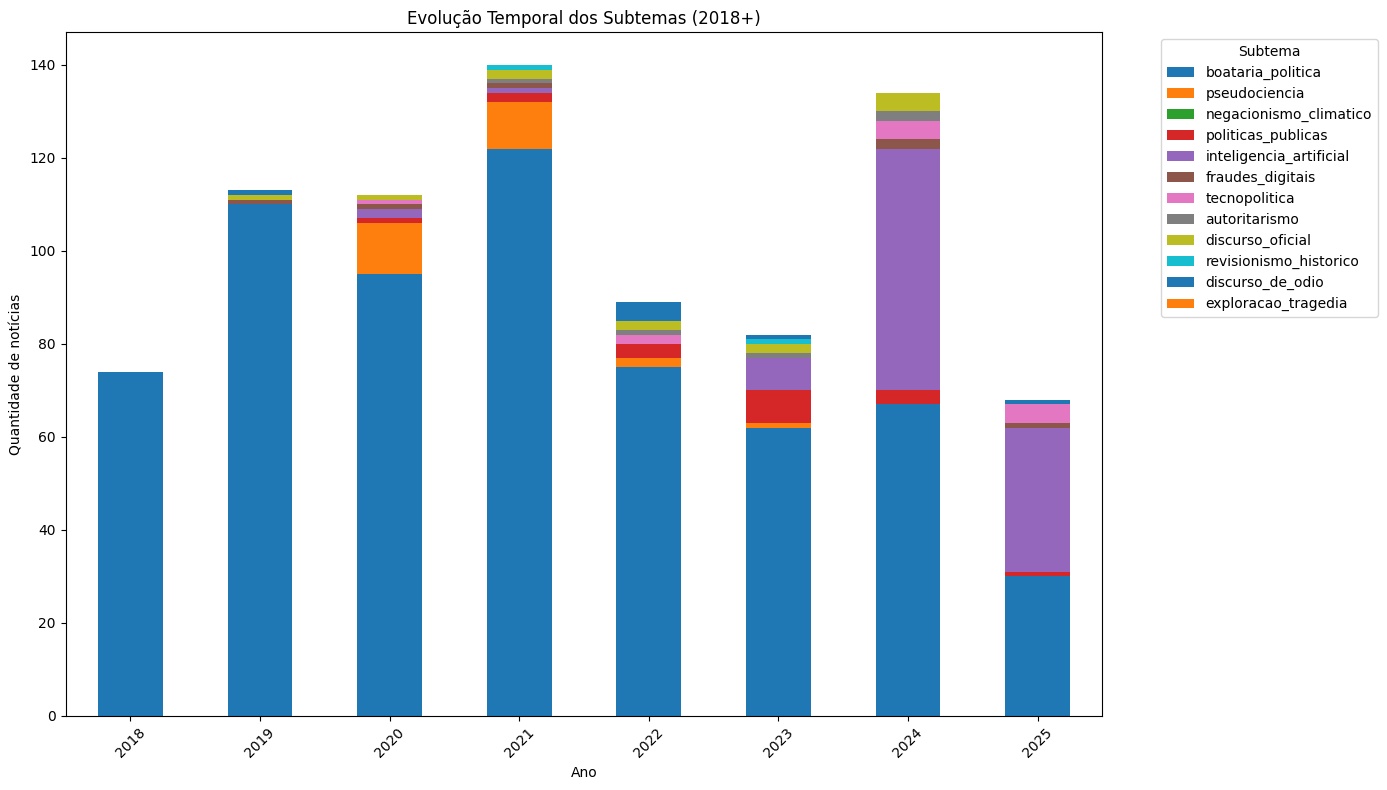

In [7]:
# ===============================
# Análise Exploratória Temática Temporal (Bloco 08b Revisado com Corte Temporal)
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import dateparser

# ===============================
# 1️⃣ Leitura e conversão da data
# ===============================

df = pd.read_csv(r'C:\Users\vbitu\projects\fake-news-etl-project\data\processed\dados_aosfatos_tematico.csv')

df['data_publicacao'] = df['data_publicacao'].apply(
    lambda x: dateparser.parse(x, languages=['pt']) if pd.notnull(x) else pd.NaT
)
df['ano'] = df['data_publicacao'].dt.year

df_valid = df[df['ano'].notna()]

# ===============================
# 2️⃣ Definição dos 12 subtemas avançados
# ===============================

subtemas = {
    'boataria_politica': ['boato', 'rumor', 'conspiração', 'mentira política', 'informação falsa política'],
    'pseudociencia': ['cura milagrosa', 'tratamento sem comprovação', 'pseudociência', 'remédio caseiro', 'placebo'],
    'negacionismo_climatico': ['negacionismo climático', 'mudança climática é falsa', 'crise climática não existe', 'aquecimento é mentira'],
    'politicas_publicas': ['política pública', 'programa governamental', 'benefício social', 'intervenção do governo'],
    'inteligencia_artificial': ['inteligência artificial', 'algoritmo', 'machine learning', 'chatgpt', 'deepfake'],
    'fraudes_digitais': ['fraude digital', 'golpe online', 'phishing', 'roubo de dados', 'senha vazada'],
    'tecnopolitica': ['tecnopolítica', 'manipulação digital', 'política nas redes sociais', 'fake news política'],
    'autoritarismo': ['autoritarismo', 'regime fechado', 'censura política', 'repressão estatal'],
    'discurso_oficial': ['discurso oficial', 'pronunciamento oficial', 'nota governamental'],
    'revisionismo_historico': ['revisionismo histórico', 'negacionismo histórico', 'revisão da história', 'alteração de fatos históricos'],
    'discurso_de_odio': ['discurso de ódio', 'ataques racistas', 'xenofobia', 'ofensas de ódio', 'intolerância'],
    'exploracao_tragedia': ['exploração de tragédia', 'aproveitamento de tragédia', 'sensacionalismo com tragédia']
}

# ===============================
# 3️⃣ Aplicação dos subtemas no dataframe
# ===============================

for tema, palavras in subtemas.items():
    padrao = '|'.join(palavras)
    df_valid[tema] = df_valid['texto_limpo'].str.contains(padrao, case=False, na=False).astype(int)

# ===============================
# 4️⃣ Aplicação do corte temporal (2018 em diante)
# ===============================

df_filtro = df_valid[df_valid['ano'] >= 2018]

# Agrupar por ano e somar os subtemas
subtemas_ano = df_filtro.groupby('ano')[list(subtemas.keys())].sum()

if not subtemas_ano.empty:
    subtemas_ano.plot(kind='bar', stacked=True, figsize=(14,8))
    plt.title("Evolução Temporal dos Subtemas (2018+)")
    plt.ylabel("Quantidade de notícias")
    plt.xlabel("Ano")
    plt.xticks(rotation=45)
    plt.legend(title="Subtema", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Sem dados válidos para gerar o gráfico dos subtemas.")
